# Word Representations in Natural Language Processing
This notebook shows examples of three different types of word representations in NLP: Bag of Words (BoW), TF-IDF, and Word2Vec.

In [2]:
# Required Libraries
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kinla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Bag of words (BoW)

Interpreting the Output of BoW
Bag of Words (BoW) model's output has two parts:

Vocabulary: This is a dictionary where the keys are the unique words in the text, and the values are their respective identifiers. Each word in the text is assigned a unique identifier.

Encoded Document: This is a matrix where the rows represent the documents and columns represent the unique words in the vocabulary. The values in the matrix are the counts of each word in each document.

In [3]:
# Example text
text = ["The quick brown fox jumped over the lazy dog."]

# Create the Transform
vectorizer = CountVectorizer()

# Tokenize and build vocab
vectorizer.fit(text)

# Encode the Document
vector = vectorizer.transform(text)

# Summarize
print('Vocabulary: ', vectorizer.vocabulary_)
print('Encoded Document: ', vector.toarray())

Vocabulary:  {'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
Encoded Document:  [[1 1 1 1 1 1 1 2]]


## TF-IDF

Interpreting the Output of TF-IDF
TF-IDF model's output is similar to the BoW model but instead of raw counts, it contains the TF-IDF scores.

Vocabulary: This is again a dictionary where the keys are the unique words in the text, and the values are their respective identifiers.

Encoded Document: This is a matrix where the rows represent the documents and columns represent the unique words in the vocabulary. The values in the matrix are the TF-IDF scores of each word in each document.

In [4]:
# Example text
text = ["The quick brown fox jumped over the lazy dog."]

# Create the Transform
vectorizer = TfidfVectorizer()

# Tokenize and build vocab
vectorizer.fit(text)

# Encode the Document
vector = vectorizer.transform(text)

# Summarize
print('Vocabulary: ', vectorizer.vocabulary_)
print('Encoded Document: ', vector.toarray())

Vocabulary:  {'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
Encoded Document:  [[0.30151134 0.30151134 0.30151134 0.30151134 0.30151134 0.30151134
  0.30151134 0.60302269]]


## Word2Vec

Interpreting the Output of Word2Vec
The output of a Word2Vec model is a bit different from the previous two:

Model's Vocabulary: This is a dictionary where keys are unique words in the text and the values are a bunch of information about the word, including its count, index, and vector representation.

Vector for a word: Word2Vec model represents each word as a high-dimensional vector (300 in this example). These vectors capture deep semantic meanings and relations with other words. For example, similar words have similar vectors, and the model can understand analogies between words.

In [6]:
# Preparing the text
text = ["The quick brown fox jumped over the lazy dog."]
tokenized_text = [nltk.word_tokenize(sent) for sent in text]

# Creating the model and setting values for the various parameters
num_features = 300  # Word vector dimensionality
min_word_count = 1  # Minimum word count
num_workers = 4     # Number of parallel threads
context = 10        # Context window size

# Initializing the train model
model = Word2Vec(
    tokenized_text,
    workers=num_workers,
    vector_size=num_features,  # Change 'size' to 'vector_size'
    min_count=min_word_count,
    window=context,
)

# Accessing the model's vocabulary
# `model.wv` represents word vector
print('Model\'s Vocabulary: ', model.wv.key_to_index)  # Update 'vocab' to 'key_to_index'

# Access vector for one word
print('Vector for "fox":', model.wv['fox'])

Model's Vocabulary:  {'.': 0, 'dog': 1, 'lazy': 2, 'the': 3, 'over': 4, 'jumped': 5, 'fox': 6, 'brown': 7, 'quick': 8, 'The': 9}
Vector for "fox": [ 3.2451833e-03 -3.2601277e-03 -2.1664966e-03  9.2792866e-04
  2.1439958e-03 -1.7891225e-03  9.1749750e-04  3.0404369e-03
 -2.2718073e-03 -2.0333040e-03 -1.6632139e-03 -1.2254707e-03
  6.1657192e-04  3.2275442e-03  2.1459253e-03  1.3236403e-04
  8.2358957e-04  2.8134971e-03  3.0429931e-03  1.8762510e-03
  1.9820877e-03 -2.5402287e-03 -1.2758906e-03 -1.8934441e-03
  2.0605915e-03 -7.5214985e-04 -2.9264784e-03  2.5397083e-03
  2.7998944e-03 -1.1067450e-03  3.0388865e-03 -2.4611989e-04
 -1.2088398e-03 -1.2823025e-04  6.4808926e-05 -1.1682988e-03
  9.3774719e-04  1.9099017e-03  2.2896698e-03 -2.9678221e-03
 -7.3090952e-04 -1.8272658e-03  2.5070333e-03  2.1672344e-03
 -1.4535740e-03  7.7561103e-04 -1.9845536e-03  7.8831908e-05
  3.1539197e-03 -8.6994725e-04 -1.7292392e-03 -2.4657364e-03
 -9.7064732e-04 -2.8810461e-04  1.1759539e-03  3.2472964e-03

## BERT

BERT is an example of contextual embeddings, usually involves more complex models and libraries than traditional bag-of-words models like TF-IDF. The transformers library by Hugging Face is a popular tool for working with pre-trained contextual embeddings models, including BERT.

In [1]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel

# Example text
text = "The quick brown fox jumped over the lazy dog."

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')

# Tokenize the input text
tokens = tokenizer(text, return_tensors='tf')

# Get BERT embeddings for each token
outputs = model(tokens)

# Extract the embeddings for the [CLS] token (which can be used as a sentence embedding)
embeddings = outputs.last_hidden_state[:, 0, :]

# Convert to a NumPy array for easy printing
embeddings_array = embeddings.numpy()

# Summarize
print('Tokenized Text:', tokens)
print('BERT Embeddings for each token:', embeddings_array)


c:\Users\kinla\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:137: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kinla\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Tokenized Text: {'input_ids': <tf.Tensor: shape=(1, 12), dtype=int32, numpy=
array([[  101,  1996,  4248,  2829,  4419,  5598,  2058,  1996, 13971,
         3899,  1012,   102]])>, 'token_type_ids': <tf.Tensor: shape=(1, 12), dtype=int32, numpy=array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])>, 'attention_mask': <tf.Tensor: shape=(1, 12), dtype=int32, numpy=array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])>}
BERT Embeddings for each token: [[-3.85998279e-01 -1.49635911e-01 -2.03795701e-01  1.36439890e-01
  -2.61864483e-01 -2.70347863e-01 -4.17576209e-02  2.85324484e-01
  -1.85535520e-01  1.11844644e-01 -2.87114322e-01  1.07268736e-01
  -1.84415057e-01  2.22199470e-01  3.48451197e-01  5.28864004e-03
  -2.22949803e-01  1.20724469e-01  1.58823833e-01 -4.29267287e-01
   3.70499268e-02 -3.02520901e-01 -2.91080415e-01 -2.72947992e-03
   3.04763801e-02 -7.56329205e-03  2.08925962e-01 -1.39680997e-01
   1.40179247e-01  2.91382402e-01 -1.33153975e-01 -6.31131306e-02
   8.59778821e-02 -2.50554442e-01 -

Cosine distance between 'paris' and 'france': 0.04573702812194824
Cosine distance between 'berlin' and 'germany': 0.03071659803390503


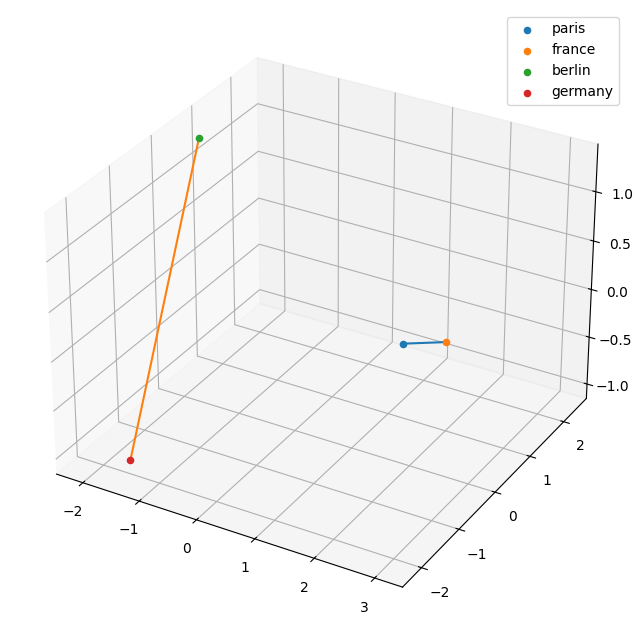

In [4]:
import numpy as np
from scipy.spatial.distance import cosine
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define word pairs
word_pairs = [("paris", "france"), ("berlin", "germany")]

# Get embeddings for each word
embeddings = {}
for pair in word_pairs:
    for word in pair:
        tokens = tokenizer(word, return_tensors='tf')
        outputs = model(tokens)
        embeddings[word] = outputs.last_hidden_state[:, 0, :].numpy().flatten()

# Compute distances
for pair in word_pairs:
    dist = cosine(embeddings[pair[0]], embeddings[pair[1]])
    print(f"Cosine distance between '{pair[0]}' and '{pair[1]}':", dist)

# Visualize in 3D space
pca = PCA(n_components=3)
embedding_values = list(embeddings.values())
embedding_values_3d = pca.fit_transform(embedding_values)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Add points
for i, word in enumerate(embeddings.keys()):
    ax.scatter(embedding_values_3d[i, 0], embedding_values_3d[i, 1], embedding_values_3d[i, 2], label=word)

# Add lines
for pair in word_pairs:
    points = [embedding_values_3d[i, :] for i, word in enumerate(embeddings.keys()) if word in pair]
    ax.plot([points[0][0], points[1][0]],
            [points[0][1], points[1][1]],
            [points[0][2], points[1][2]])

ax.legend()
plt.show()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

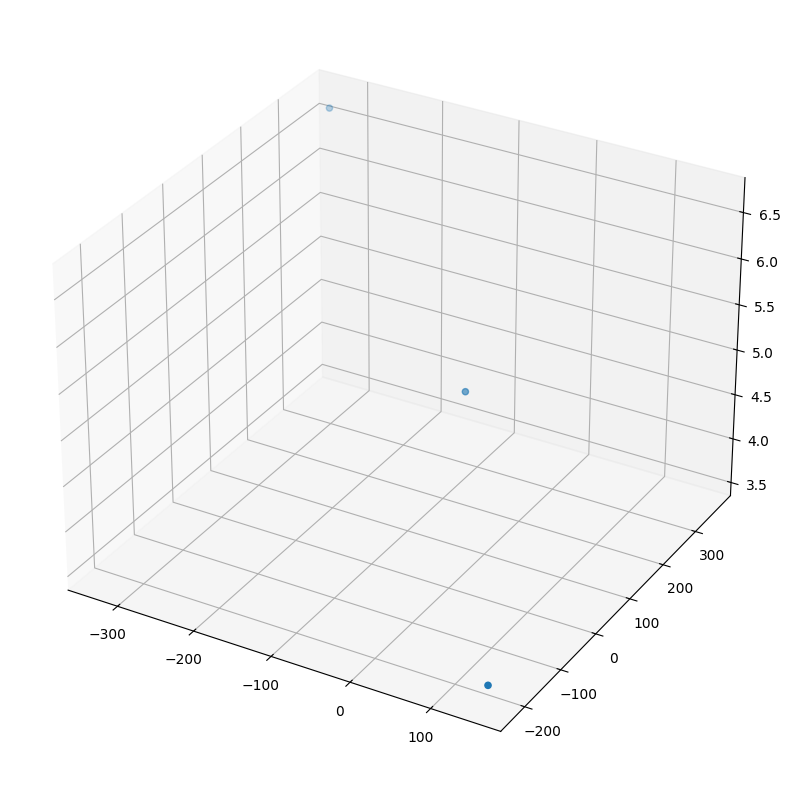

In [11]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from transformers import BertTokenizer, TFBertModel

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')

# Let's assume we have some sentences
sentences = ["This is a sample sentence.", "This is another one.", "BERT embeddings are interesting."]

# Convert sentences to BERT input
inputs = tokenizer(sentences, return_tensors="tf", padding=True, truncation=True, max_length=512)

# Forward pass through BERT model
outputs = model(inputs.input_ids, attention_mask=inputs.attention_mask)

# Use the average of the last hidden state as the sentence embedding
embeddings = tf.reduce_mean(outputs.last_hidden_state, axis=1)

# Perform t-SNE
# Set perplexity to less than the number of samples
tsne_model = TSNE(n_components=3, random_state=0, perplexity=len(sentences)-1)
tsne_values = tsne_model.fit_transform(embeddings)

# Plot in 3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_values[:, 0], tsne_values[:, 1], tsne_values[:, 2])
plt.show()

# Similar Words
We can also use the Word2Vec model to find words that are most similar to a given word.

In [ ]:
# Find the top 5 words similar to 'king'
similar_words = model.wv.most_similar('king', topn=5)
print("Words similar to 'king':", similar_words)

# Additional Word Vector Analysis
In this part of the notebook, we'll analyze more word pairs to demonstrate how the difference between their vectors often represent semantic relationships. We'll also visualize these word pairs in a 3D space.

In [ ]:
# Additional word pairs
word_pairs = [('king', 'queen'), ('man', 'woman')]

# Compute vector differences for each pair
vector_differences = []
for pair in word_pairs:
    vector_differences.append(model.wv[pair[0]] - model.wv[pair[1]])

# Print vector differences
for pair, diff in zip(word_pairs, vector_differences):
    print(f"Vector difference between '{pair[0]}' and '{pair[1]}': {diff}")

# 3D Visualization
Now we'll visualize these word pairs in a 3D space using Matplotlib.

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Prepare word vectors for PCA
word_vectors = []
for pair in word_pairs:
    word_vectors.append(model.wv[pair[0]])
    word_vectors.append(model.wv[pair[1]])

# Perform PCA to reduce dimensionality to 3
pca = PCA(n_components=3)
result = pca.fit_transform(word_vectors)

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Add each word pair to the plot
colors = ['b', 'r', 'g']
for i in range(0, len(result), 2):
    ax.scatter(result[i:i+2, 0], result[i:i+2, 1], result[i:i+2, 2], color=colors[i//2])
    ax.text(result[i, 0], result[i, 1], result[i, 2], word_pairs[i//2][0])
    ax.text(result[i+1, 0], result[i+1, 1], result[i+1, 2], word_pairs[i//2][1])

# Set labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Word Vectors in 3D Space')

# Show the plot
plt.show()